In [1]:
import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/Users/anil/Downloads/Project 6.0/Japan_used_cars_datasets.csv')
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
data.tail()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline
2317,2335,1400,toyota,estima t,2005,72320,3000,at,2wd,rhd,gasoline


In [4]:
data.shape

(2318, 11)

In [5]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


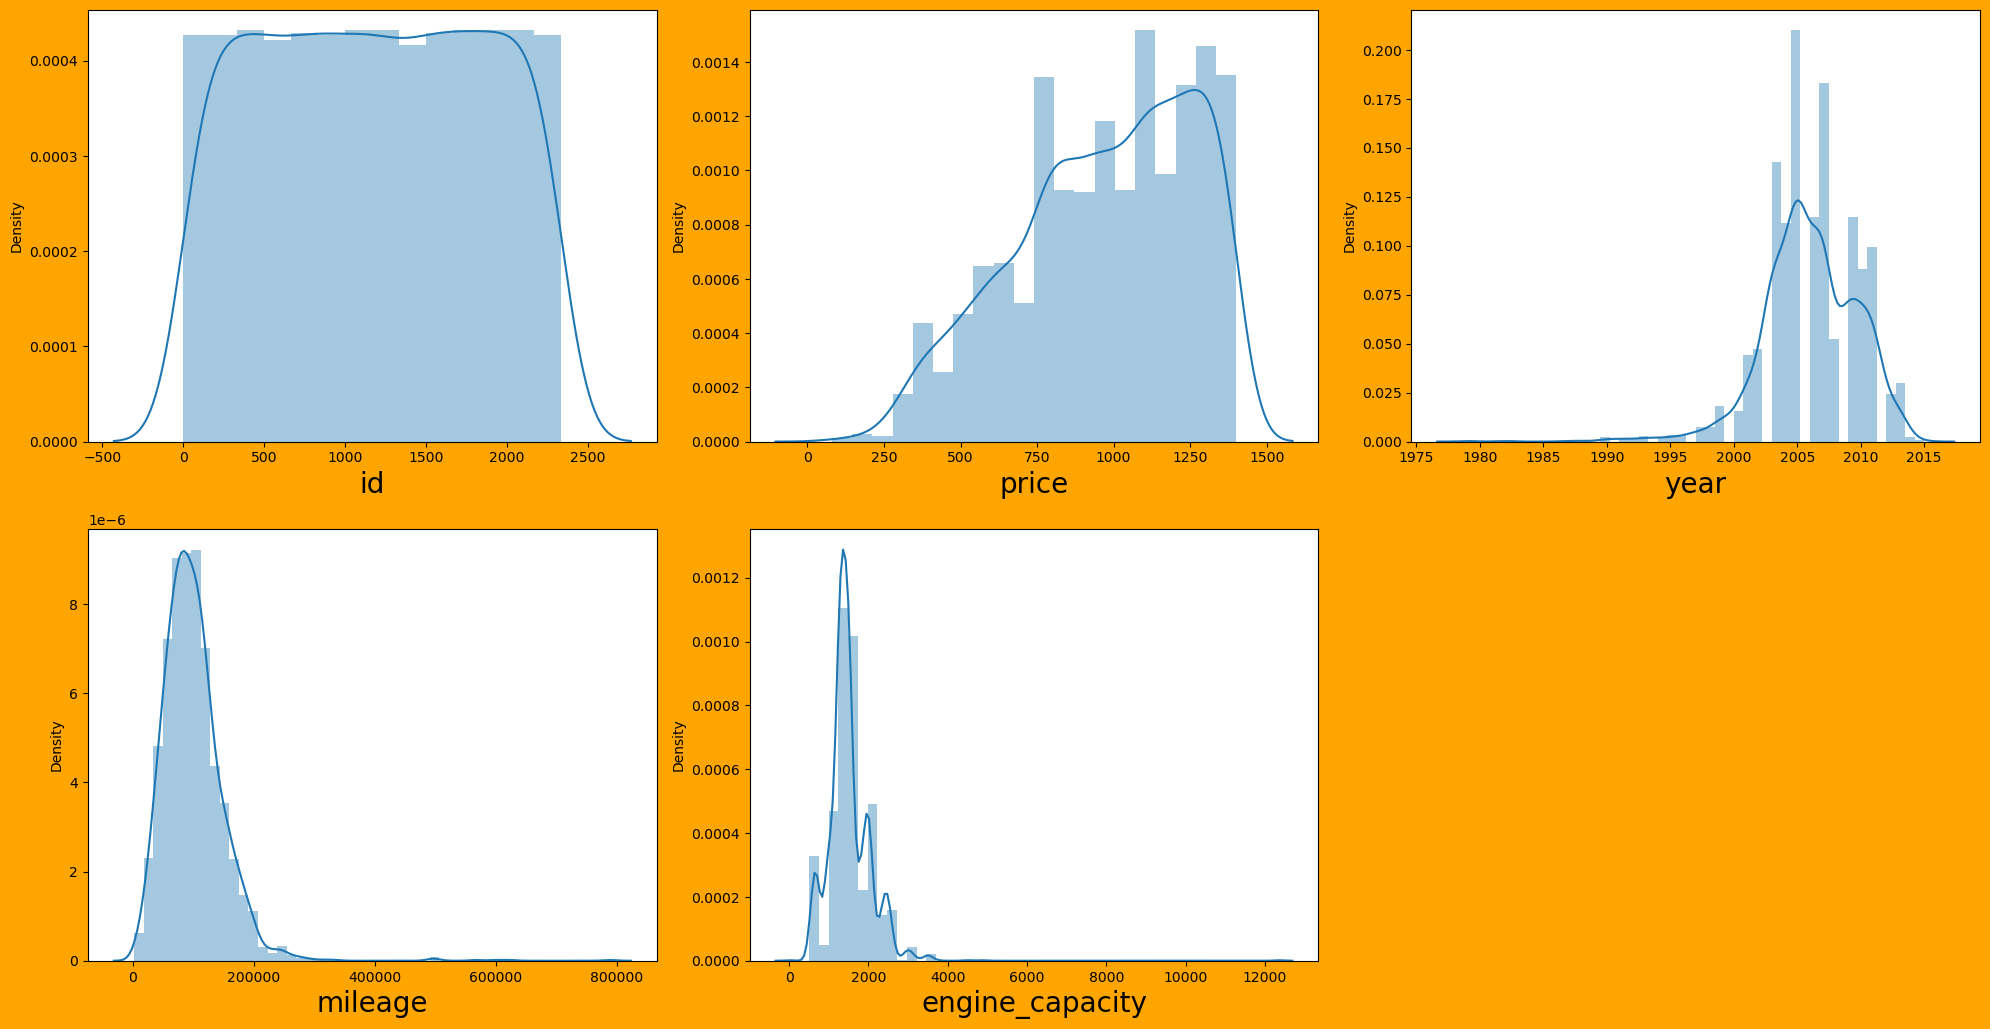

In [6]:
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column], kde=True)  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [7]:
import numpy as np

# data['price_log'] = np.log1p(data['price'])  # log(1 + price) to handle zeros
# data['mileage_log'] = np.log1p(data['mileage'])
data['price']=data['price'].replace(np.log1p(data['price']))
data['mileage']=data['mileage'].replace(np.log1p(data['mileage']))


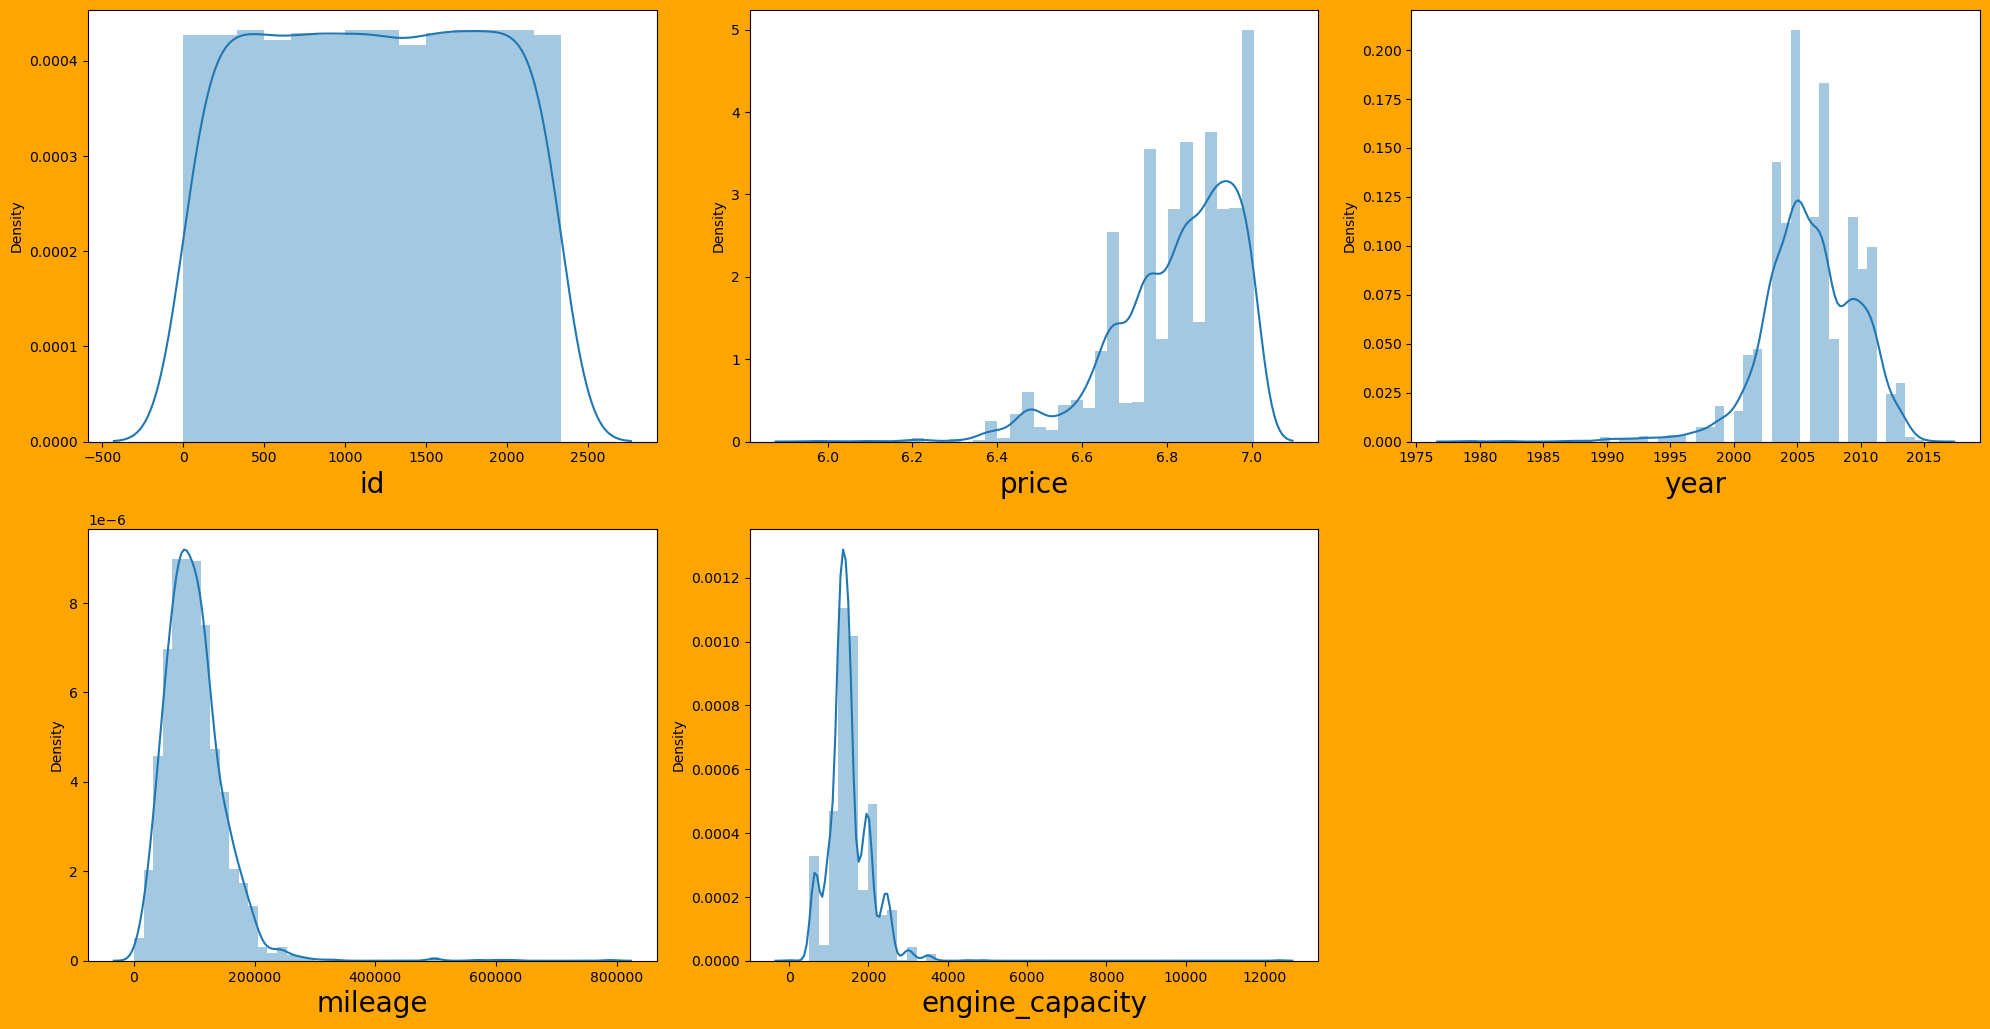

In [8]:
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column], kde=True)  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


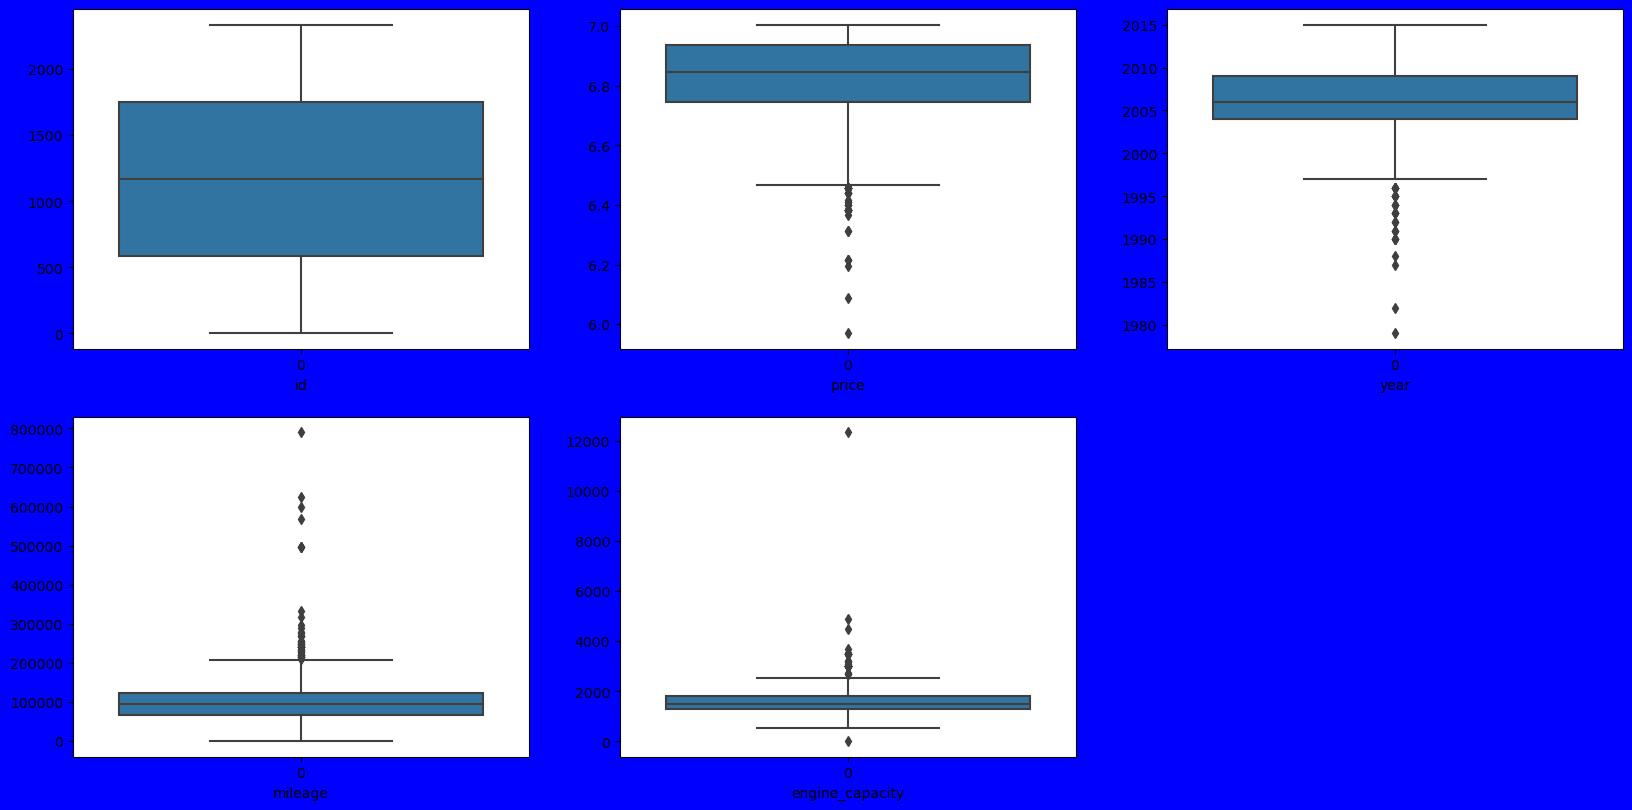

In [9]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in data.select_dtypes(include=['int64', 'float64']):
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
    plotnumber +=1
plt.show()

In [10]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,6.824403,2005.972390,100012.336803,1507.010785
std,674.460724,0.143580,3.698863,52514.097599,549.585170
min,0.000000,5.968708,1979.000000,10.709271,9.000000
25%,583.250000,6.746412,2004.000000,67000.000000,1300.000000
50%,1168.500000,6.846943,2006.000000,94000.000000,1490.000000
75%,1753.750000,6.937314,2009.000000,124000.000000,1800.000000
max,2335.000000,7.004882,2015.000000,790000.000000,12340.000000


In [11]:
# IQR Outlier Removal
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

id                   583.250000
price                  6.746412
year                2004.000000
mileage            67000.000000
engine_capacity     1300.000000
Name: 0.25, dtype: float64
id                   1753.750000
price                   6.937314
year                 2009.000000
mileage            124000.000000
engine_capacity      1800.000000
Name: 0.75, dtype: float64
id                  1170.500000
price                  0.190902
year                   5.000000
mileage            57000.000000
engine_capacity      500.000000
dtype: float64


In [12]:
# Columns where we want to remove outliers
columns = ['price', 'mileage', 'engine_capacity']

for column in columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper bound for outliers
    upper_bound = q3 + (1.5 * iqr)
    
    # Find indexes of outliers
    index = np.where(data[column] > upper_bound)
    
    # Drop the outliers
    data = data.drop(data.index[index])

# Reset index after all the outliers are removed
data = data.reset_index(drop=True)

# Print the new shape
data.shape


(2232, 11)

In [13]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,1166.861559,6.824010,2006.014785,95675.435802,1467.703405
std,673.293479,0.143576,3.664585,40816.086331,442.827299
min,0.000000,5.968708,1979.000000,10.709271,9.000000
25%,582.750000,6.746412,2004.000000,66000.000000,1296.750000
50%,1168.500000,6.846943,2006.000000,92000.000000,1490.000000
75%,1750.250000,6.937314,2009.000000,121000.000000,1700.000000
max,2334.000000,7.004882,2015.000000,208434.000000,2520.000000


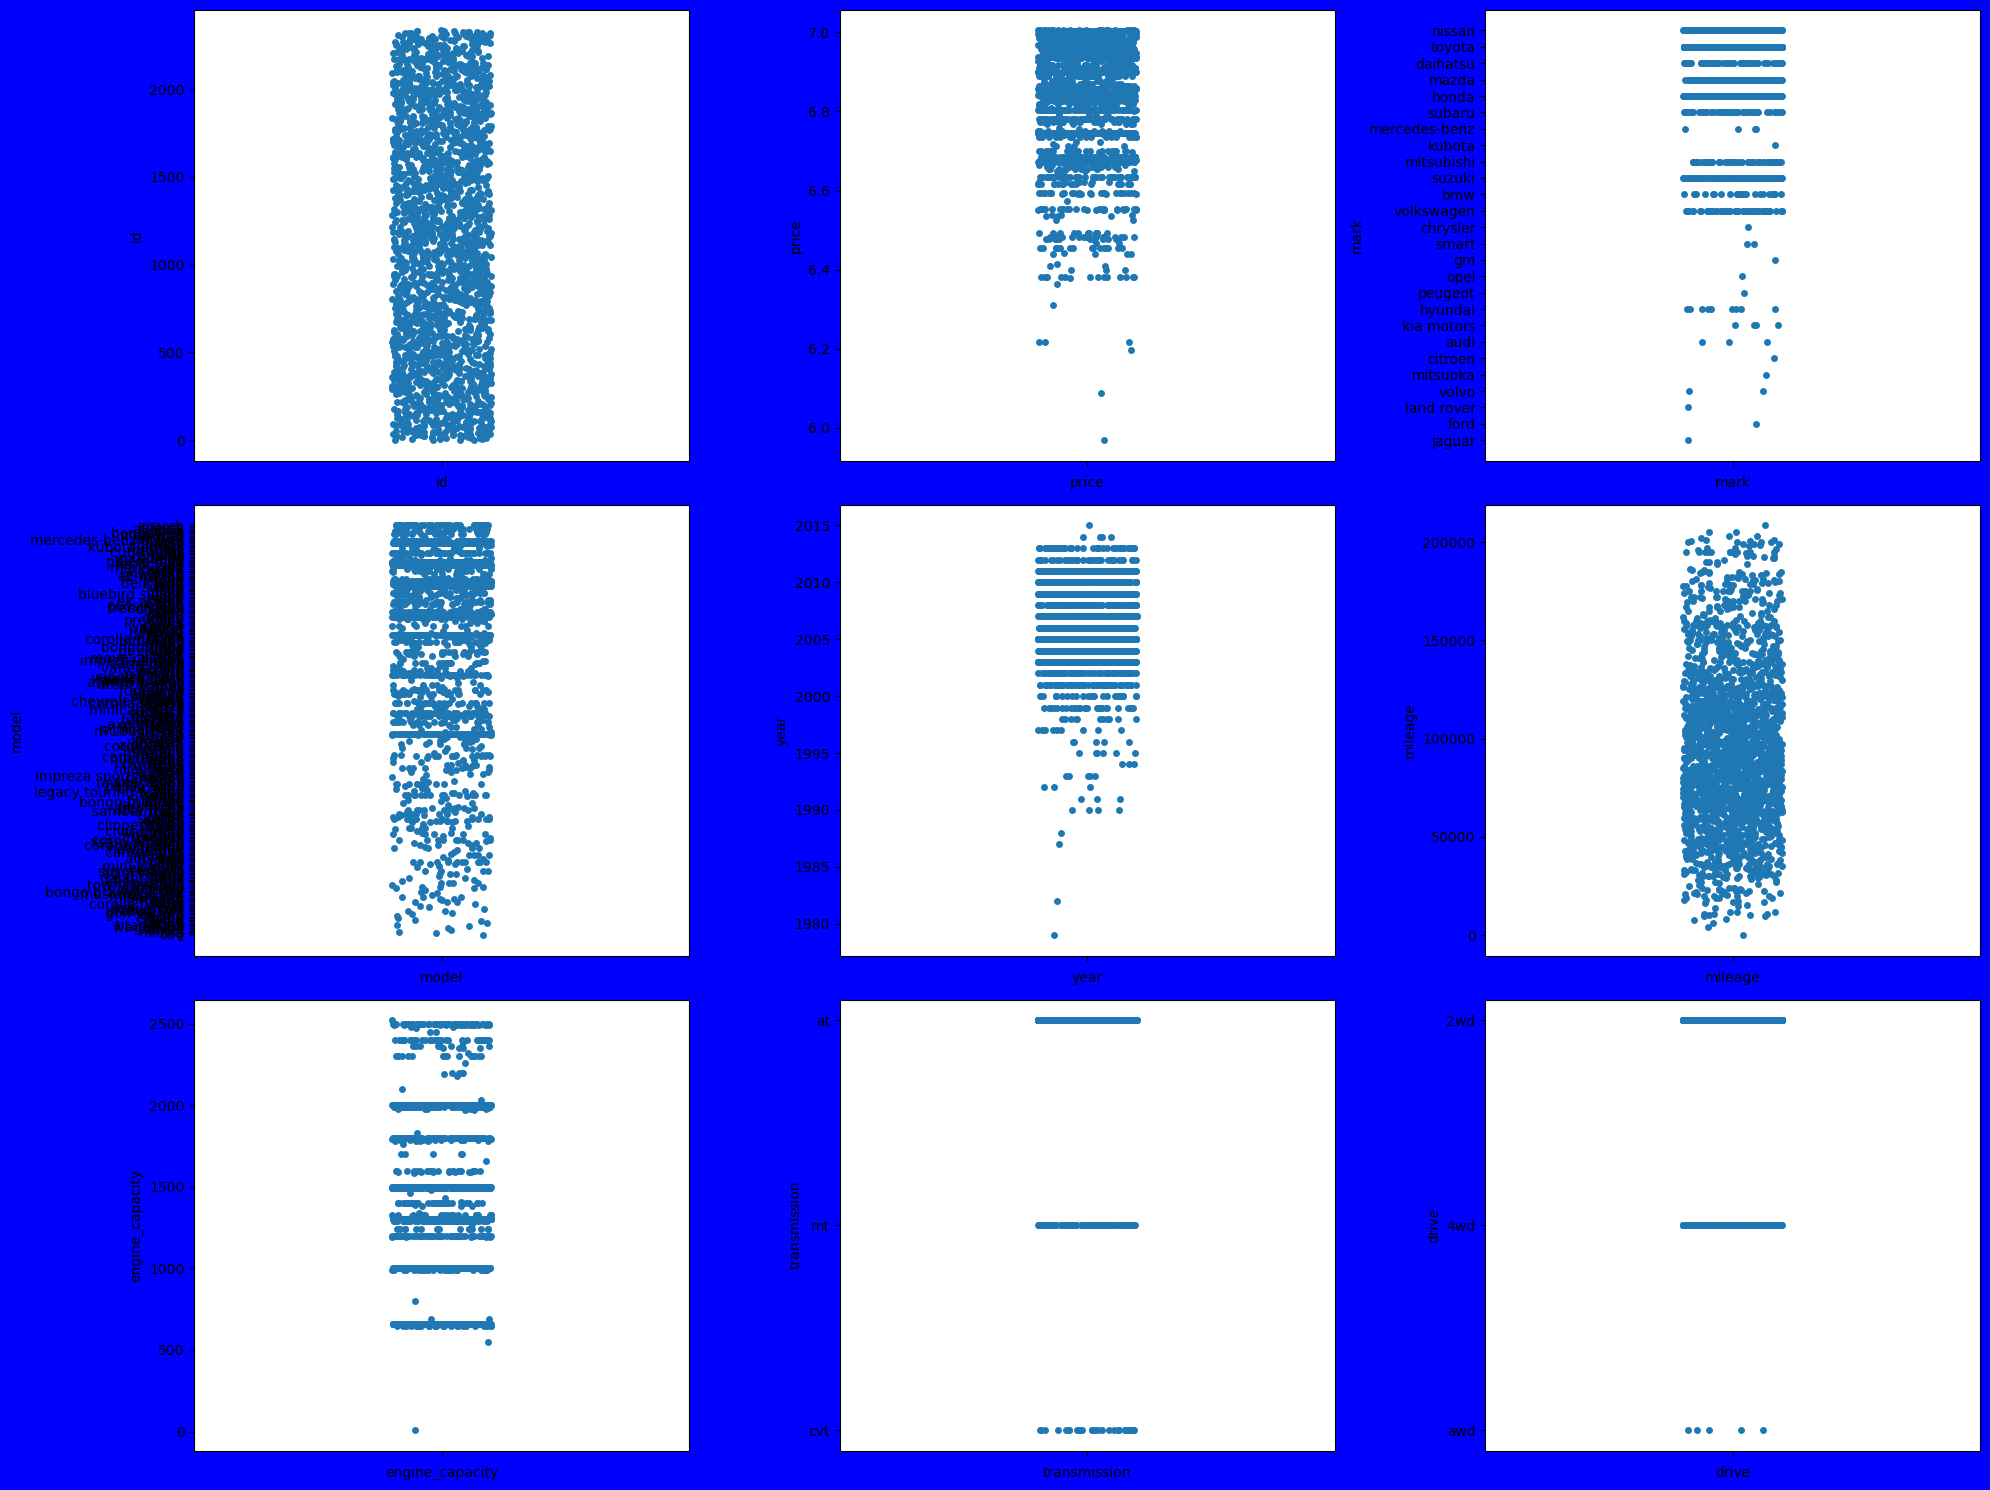

In [14]:
# Plotting strip plots for the numeric columns after removing outliers
plt.figure(figsize=(20, 15), facecolor='blue')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.stripplot(data=data, y=column, jitter=True)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [16]:
scaler=StandardScaler()

In [17]:
numeric_columns = ['price', 'mileage', 'engine_capacity', 'year']  # Add any other numeric columns you want

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
data_scaled = data.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [18]:
data_scaled[numeric_columns]

,price,mileage,engine_capacity,year
0,-5.958484,-0.384136,-0.514319,-0.822865
1,-5.120151,-1.045789,-0.604668,1.087738
2,-4.371951,-1.175914,1.202310,-0.276979
3,-4.231492,0.857343,1.179723,0.541851
4,-4.231492,-0.719864,-1.824378,-0.004035
...,...,...,...,...
2227,1.260051,0.151900,1.202310,-0.276979
2228,1.260051,0.400044,-0.378795,0.268908
2229,1.260051,0.620595,-1.065447,0.814795
2230,1.260051,0.130482,-1.824378,-0.276979


In [19]:
# Creating a DataFrame of the standardized numeric features
X = data_scaled[numeric_columns]

# Add a constant to the dataset (required for VIF calculation)
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the Intercept VIF as it's not a predictor
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# Display the VIF values
print(vif_data)


           Feature       VIF
0            price  1.076404
1          mileage  1.024930
2  engine_capacity  1.055715
3             year  1.073255


In [20]:
#Splittng the data into train and test
# Perform One-Hot Encoding for categorical columns
categorical_columns = ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']
X_encoded = pd.get_dummies(data_scaled.drop('price', axis=1), columns=categorical_columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data_scaled['price'], test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1785, 281)
X_test shape: (447, 281)
y_train shape: (1785,)
y_test shape: (447,)


In [21]:
def metrics_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(X_train)
        print("==================Training Score=================")
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_train, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_train, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_train, y_pred))
    else:
        y_pred = model.predict(X_test)
        print("==================Test Score=================")
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_test, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_test, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_test, y_pred))

In [22]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

In [24]:
metrics_score(lr_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(lr_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  0.17247997996785994
Mean Squared Error (MSE) ==>  0.08464354526892828
R-squared (R2) ==>  0.9169030321999451
==================Test Score=================
Mean Absolute Error (MAE) ==>  9144157.444070855
Mean Squared Error (MSE) ==>  2.1362836690010496e+16
R-squared (R2) ==>  -2.3149322668633416e+16


In [25]:
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"Linear Regression Cross-Validation R² Scores: {cv_scores_lr}")
print(f"Linear Regression Mean Cross-Validation R² Score: {np.mean(cv_scores_lr)}\n")

Linear Regression Cross-Validation R² Scores: [-3.62009859e+12 -9.39628864e+14  8.56632142e-01  8.66356495e-01
 -8.65508813e+13]
Linear Regression Mean Cross-Validation R² Score: -205959968777279.62



In [26]:
# Decision Tree

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

In [27]:

metrics_score(dt_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(dt_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  2.4424323441425383e-16
Mean Squared Error (MSE) ==>  1.342738733780919e-31
R-squared (R2) ==>  1.0
==================Test Score=================
Mean Absolute Error (MAE) ==>  0.002012656711577801
Mean Squared Error (MSE) ==>  0.00013666245863642196
R-squared (R2) ==>  0.9998519090232458


In [28]:
# Perform 5-fold cross-validation for Decision Tree Regressor
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"Decision Tree Cross-Validation R² Scores: {cv_scores_dt}")
print(f"Decision Tree Mean Cross-Validation R² Score: {np.mean(cv_scores_dt)}\n")


Decision Tree Cross-Validation R² Scores: [0.9924114  0.99951422 0.99823492 0.99968585 0.99788563]
Decision Tree Mean Cross-Validation R² Score: 0.9975464028343209



In [29]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

In [31]:
metrics_score(rf_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(rf_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  0.0015052736614770698
Mean Squared Error (MSE) ==>  0.00021623776643085225
R-squared (R2) ==>  0.9997877132549544
==================Test Score=================
Mean Absolute Error (MAE) ==>  0.0023156310262881993
Mean Squared Error (MSE) ==>  8.150573164143061e-05
R-squared (R2) ==>  0.9999116782799733


In [32]:
# Perform 5-fold cross-validation for Random Forest Regressor
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"Random Forest Cross-Validation R² Scores: {cv_scores_rf}")
print(f"Random Forest Mean Cross-Validation R² Score: {np.mean(cv_scores_rf)}\n")


Random Forest Cross-Validation R² Scores: [0.99899989 0.99991037 0.99534123 0.99963802 0.99990517]
Random Forest Mean Cross-Validation R² Score: 0.9987589370057914



In [33]:
#MLP Neural Networks
from sklearn.neural_network import MLPRegressor

In [34]:
# Initialize the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)


In [35]:
metrics_score(mlp_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(mlp_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  0.05205658683483803
Mean Squared Error (MSE) ==>  0.005039769339791195
R-squared (R2) ==>  0.995052315575656
==================Test Score=================
Mean Absolute Error (MAE) ==>  0.06142461099916147
Mean Squared Error (MSE) ==>  0.0077049351819267016
R-squared (R2) ==>  0.991650732847163


In [36]:
# Perform 5-fold cross-validation for MLP Regressor
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"MLP Regressor Cross-Validation R² Scores: {cv_scores_mlp}")
print(f"MLP Regressor Mean Cross-Validation R² Score: {np.mean(cv_scores_mlp)}\n")


MLP Regressor Cross-Validation R² Scores: [0.9835909  0.8211286  0.98387905 0.94554864 0.9888824 ]
MLP Regressor Mean Cross-Validation R² Score: 0.944605919474202



In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
# Initialize the AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

In [39]:
metrics_score(ada_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(ada_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  0.07770923654473935
Mean Squared Error (MSE) ==>  0.008918856669006369
R-squared (R2) ==>  0.9912441055832075
==================Test Score=================
Mean Absolute Error (MAE) ==>  0.08334999905887454
Mean Squared Error (MSE) ==>  0.009840184022605966
R-squared (R2) ==>  0.9893369219470486


In [40]:
# Perform 5-fold cross-validation for AdaBoost Regressor
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"AdaBoost Cross-Validation R² Scores: {cv_scores_ada}")
print(f"AdaBoost Mean Cross-Validation R² Score: {np.mean(cv_scores_ada)}\n")


AdaBoost Cross-Validation R² Scores: [0.98904363 0.98992963 0.98775326 0.98841203 0.98792304]
AdaBoost Mean Cross-Validation R² Score: 0.9886123179023721



### Since Random Forest performed the best, we will now do hyperparameter tuning

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit the model with GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R² Score: 0.9987690770302591


In [42]:
tuned_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the tuned model
tuned_rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = tuned_rf_model.predict(X_test)

In [43]:
metrics_score(tuned_rf_model, X_train, X_test, y_train, y_test, train=True)  # For training performance

metrics_score(tuned_rf_model, X_train, X_test, y_train, y_test, train=False)  # For test performance

==================Training Score=================
Mean Absolute Error (MAE) ==>  0.0015082766209924125
Mean Squared Error (MSE) ==>  0.00020152696600387855
R-squared (R2) ==>  0.9998021552647439
==================Test Score=================
Mean Absolute Error (MAE) ==>  0.0023148069377845713
Mean Squared Error (MSE) ==>  7.707331044923991e-05
R-squared (R2) ==>  0.9999164813662802
